# Pre process

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
import pandas as pd
dataframe = pd.read_excel('DataSet.xlsx')

1

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [12]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


2

In [13]:
print(dataframe.isnull().sum())
dataframe.isnull().sum() /len(dataframe)

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64


CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.051383
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.053360
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.039526
LSTAT      0.000000
MEDV       0.106719
dtype: float64

4

In [14]:
corr_dataframe = dataframe.corr()

<Axes: >

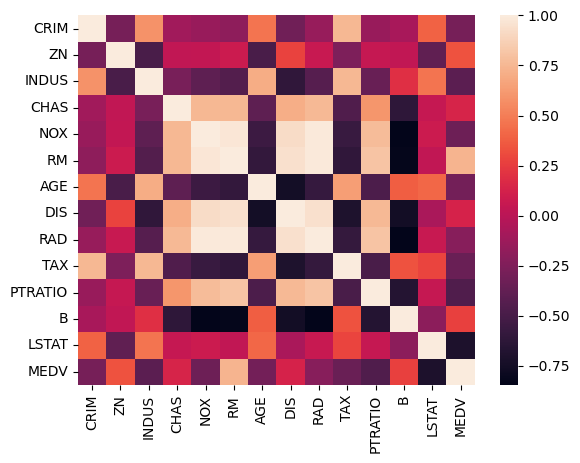

In [15]:
sns.heatmap(corr_dataframe)

RM,LSTAT are more effective on MEDV(target).

5

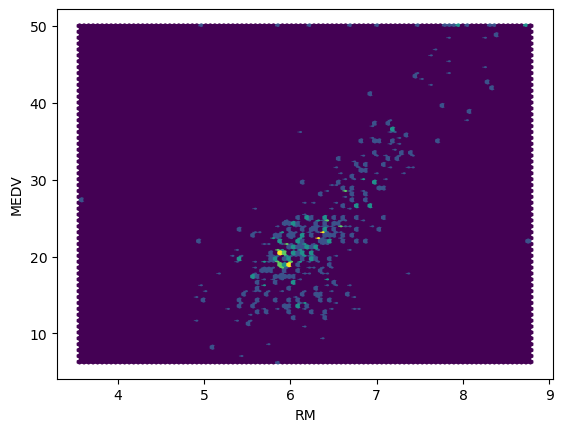

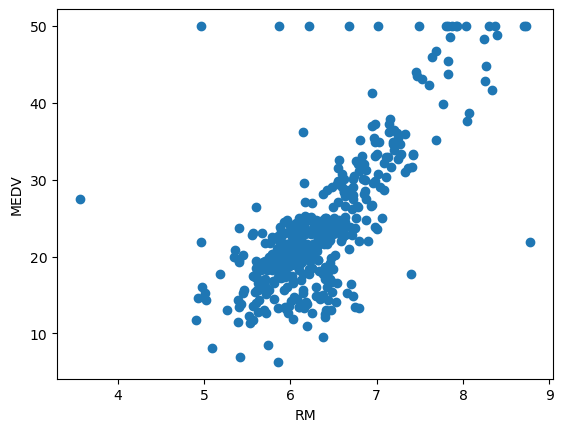

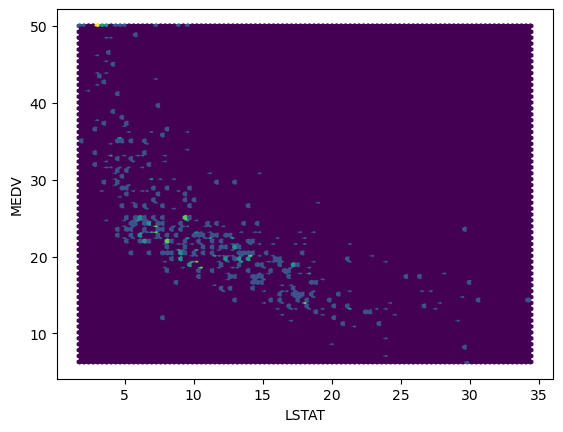

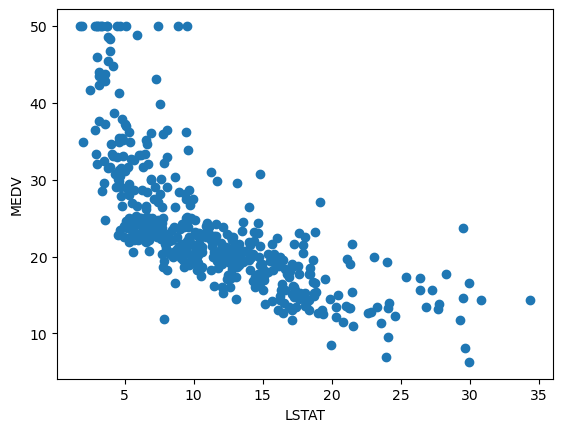

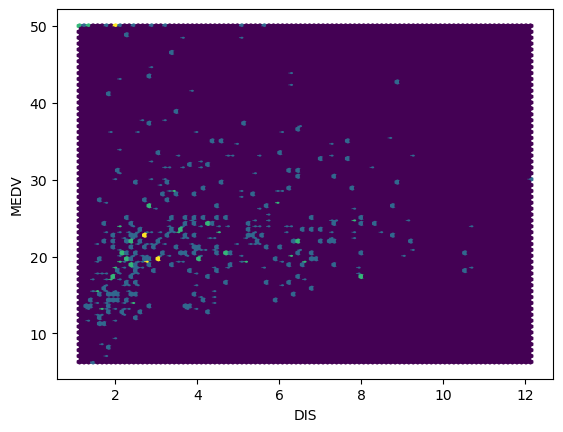

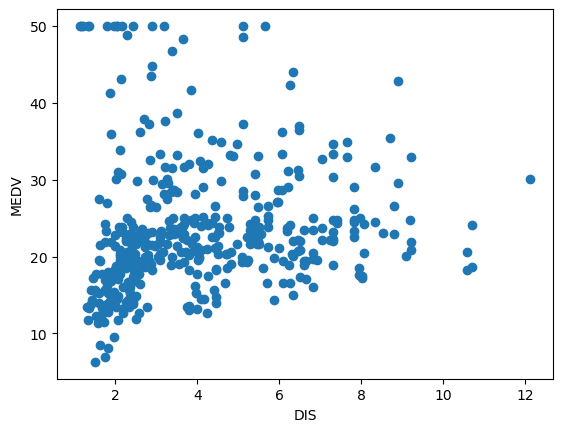

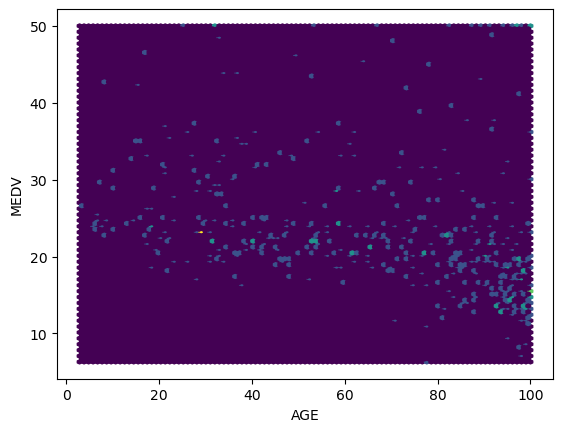

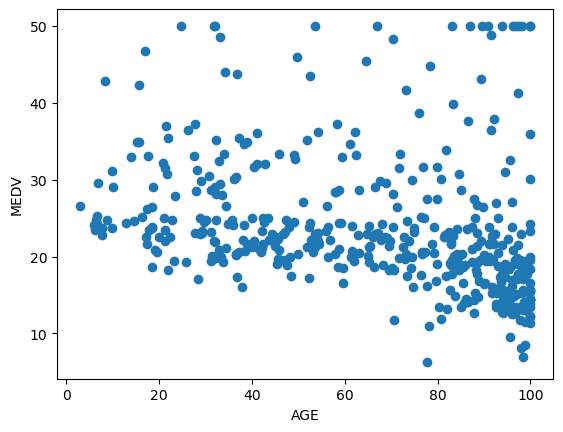

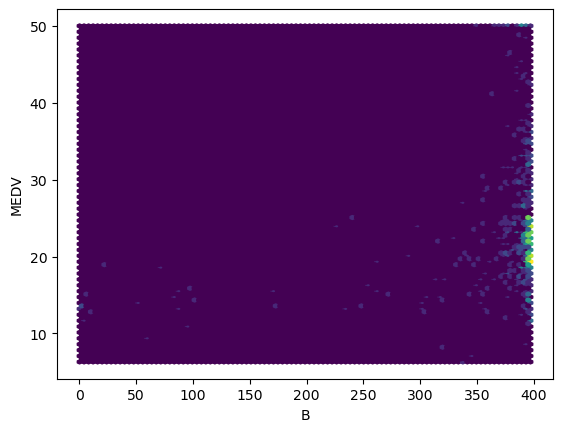

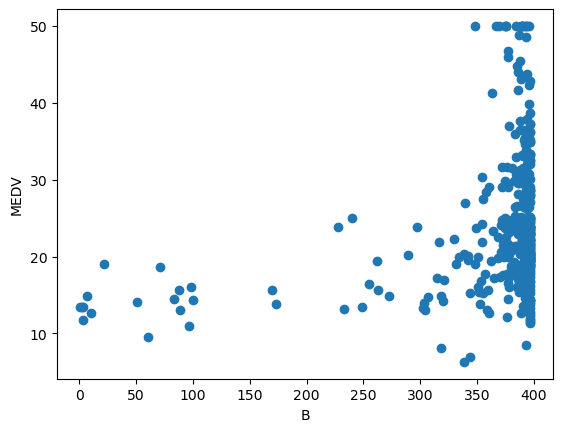

In [16]:
plt.hexbin(dataframe.get('RM'), dataframe.get('MEDV'))
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

plt.scatter(dataframe.get('RM'), dataframe.get('MEDV'))
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

plt.hexbin(dataframe.get('LSTAT'), dataframe.get('MEDV'))
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

plt.scatter(dataframe.get('LSTAT'), dataframe.get('MEDV'))
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()


plt.hexbin(dataframe.get('DIS'), dataframe.get('MEDV'))
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

plt.scatter(dataframe.get('DIS'), dataframe.get('MEDV'))
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

plt.hexbin(dataframe.get('AGE'), dataframe.get('MEDV'))
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

plt.scatter(dataframe.get('AGE'), dataframe.get('MEDV'))
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

plt.hexbin(dataframe.get('B'), dataframe.get('MEDV'))
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

plt.scatter(dataframe.get('B'), dataframe.get('MEDV'))
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

7

* Replacing with the mean:
    This is the most common method of imputing missing values of numeric columns. we use the ‘fillna’ method for imputing the columns with the mean of the respective column values.
* Replacing with the median:
    The median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.
* Impute the Most Frequent Value:
    its a way to impute missing values for categorical features. we use the most frequent value to fill the missing value.
* Replacing with the previous(next) value – forward fill(backward fill):
    imputing the values with the previous(next) value. It is mostly used in time series data.     
* Interpolation:
    Pandas’ interpolate method can be used to replace the missing values with different interpolation methods like polynomial, linear and quadratic.
* Nearest Neighbors Imputations (KNNImputer):
    

In [9]:
#replacing with the mean


# dataframe['RM'] = dataframe['RM'].fillna(dataframe['RM'].mean())


# dataframe['LSTAT'] = dataframe['LSTAT'].fillna(dataframe['LSTAT'].mean())

# #CHAS
# dataframe['CHAS'] = dataframe['CHAS'].fillna(dataframe['CHAS'].mean())

# #DIS
# dataframe['DIS'] = dataframe['DIS'].fillna(dataframe['DIS'].mean())

# #B
# dataframe['B'] = dataframe['B'].fillna(dataframe['B'].mean())

#MEDV

# dataframe['MEDV'] = dataframe['MEDV'].fillna(dataframe['MEDV'].mean())

In [10]:
#replacing with the median

# #CHAS
# dataframe['CHAS'] = dataframe['CHAS'].fillna(dataframe['CHAS'].median())

# #DIS
# dataframe['DIS'] = dataframe['DIS'].fillna(dataframe['DIS'].median())

# #B
# dataframe['B'] = dataframe['B'].fillna(dataframe['B'].median())

# #MEDV

# dataframe['MEDV'] = dataframe['MEDV'].fillna(dataframe['MEDV'].median())

In [11]:
# from sklearn.impute import KNNImputer
# impute_knn = KNNImputer(n_neighbors=2)
# impute_knn.fit_transform(dataframe)

8

drop those columns that have no correlation with target and have missing values.

drop one of the two columns that are correlated to each other.

In [17]:
#remove null rows from MEDV

dataframe = dataframe.dropna(subset=['MEDV'])


In [18]:
dataframe = dataframe.drop(columns = ['CHAS', 'DIS', 'B'])

we can remove those columns that have no correlation(positive, negative) with the target(MEDV).


9

## Categorical vs Numerical
#### Categorical

* Categorical data can be stored and identified by names or labels 
* It’s incompatible with most statistical 
* Categorical data Can take numerical numbers but has qualitative characteristics.
* support Ordinal and Nominal data.

#### Numerical

* Numerical data are numbers.
* It supports most statistical calculations.
* Numerical data can be easily arranged and understood.

all the columns are Numerical Except CHAS that is Categorical because the values are just 0 and 1.


10

## Normalization vs Standardization

Normalization mostly used when we use algorithms that assume the input features are on a similar scale or bounded range, such as neural networks. 
also use For models where the magnitude of variables is important, such as k-nearest neighbours.

Standardization mostle usaed when we use Algorithms that assume the input features are normally distributed with zero mean and unit variance, such as SVM, Logistic Regression. It is often used before applying PCA to ensure that each feature contributes equally to the analysis.


### Difference:
#### Standardization

* Standardization Transforms data to have a mean of 0 and a standard deviation of 1.
* Less sensitive to outliers.
* Assumes the distribution of data is normal.
#### Normalization

* Normalization Scales data to a fixed range, typically 0 to 1.
* Highly sensitive to outliers since min and max are affected.
* Does not assume any distribution of the data.





11

1. Ordinal encoding:
This encoding is used when it is required to maintain the level or order of categories when converting them into numeric form.

2. One Hot Encoding:
This encoding is used for nominal features where the categories do not have a specific order. In this encoding, a separate column is created for each category. These columns are assigned binary values (0 or 1) based on the category for that row. 1 shows the presence of the category and 0 shows absence of the category in that column. The new columns created in this process are called dummy variables. 

3. Frequency Encoding: 
In this encoding, a number is assigned to each category based on its frequency in the dataset.


In [20]:
max_value = dataframe["MEDV"].max()
min_value = dataframe["MEDV"].min()
dataframe["MEDV"] = (dataframe["MEDV"] - min_value) / (max_value - min_value)

## Train Test Validation

Training Set: It is the set of data that is used to train and make the model learn.

The Validation Set: It is a set of data, separate from the training set, that is used to validate our model performance during training.

The Test Set: It is a separate set of data used to test the model after completing the training.

most common splits:
80, 10, 10

70, 15, 15

60, 20, 20


K-Fold Cross-Validation is a more robust technique for data splitting, where a model is trained and evaluated “K” times on different samples. 
each time one of the sections is test and the others are train. 


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe.loc[:, dataframe.columns != "MEDV"], dataframe['MEDV'], test_size=0.3, random_state=42)

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [22]:
def linear_regression(input, output):
  x_hat = input.sum() / input.shape[0]
  y_hat = output.sum() / output.shape[0]
  xy_sum = 0
  xx_sum = 0
  for i in range(input.shape[0]):
    xy_sum += (input[i] - x_hat) * (output[i] - y_hat)
    xx_sum += (input[i] - x_hat)**2
  slope = xy_sum / xx_sum
  intercept = y_hat - slope * x_hat

  return intercept, slope

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [23]:
import numpy as np
def get_regression_predictions(input, intercept, slope):
    predicted_y = []
    for i in range(input.shape[0]):
        predicted_y.append(slope * input[i] + intercept)
    predicted_y = np.array(predicted_y)    
    return predicted_y

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [24]:
def get_root_mean_square_error(predicted_values, actual_values):
  sum = 0
  n = predicted_values.shape[0]
  for i in range(n):
    sum += (predicted_values[i] - actual_values[i]) ** 2

  RMSE = (sum / n) ** 0.5
  return (RMSE)


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [25]:
def get_r2_score(predicted_values, actual_values):
  sum_true_pred = 0
  sum_true_mean = 0
  n = predicted_values.shape[0]
  y_true_hat = actual_values.sum() / n
  for i in range(n):
    sum_true_pred += (actual_values[i] - predicted_values[i]) ** 2
    sum_true_mean += (actual_values[i] - y_true_hat) ** 2
  R2 = 1 - (sum_true_pred / sum_true_mean)  
  return R2


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

19, 20

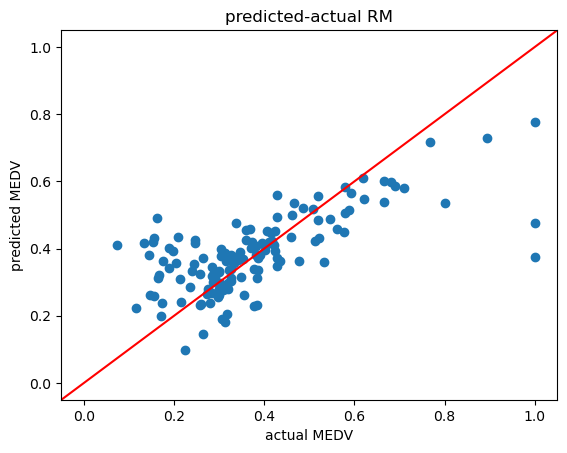

R2 score: 0.4739947670064679
RMSE score: 0.126889206902111


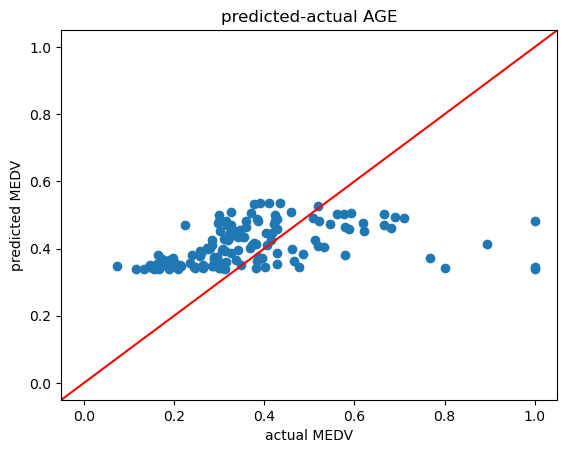

R2 score: 0.09042111386681162
RMSE score: 0.16685907658597413


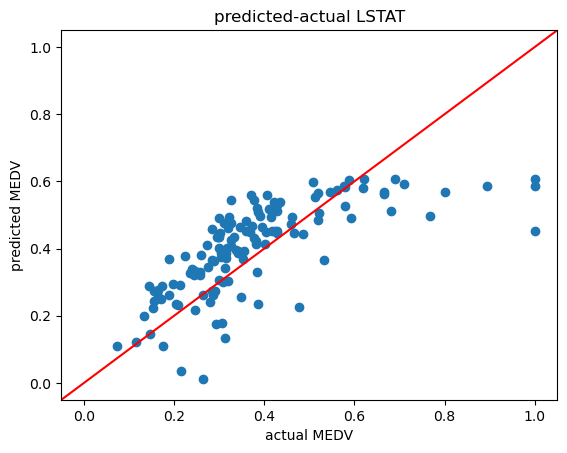

R2 score: 0.48226612739802555
RMSE score: 0.12588759603403127


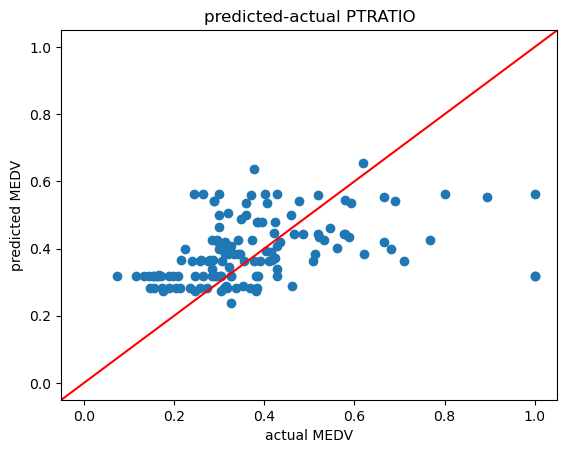

R2 score: 0.16039515440657148
RMSE score: 0.16031240103809496


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

designated_feature_list = ['RM', 'AGE', 'LSTAT', 'PTRATIO'] # ToDo


# d = preprocessing.normalize(dataframe, )
# dataframe = pd.DataFrame(d, columns=dataframe.columns)


for feature in designated_feature_list:
  X_train, X_test, y_train, y_test = train_test_split(np.array(dataframe.get(feature)), np.array(dataframe.get('MEDV')), test_size=0.3, random_state=42)

  # plt.scatter(X_test, y_test)
  # plt.show()
  input_feature = X_train
  output = np.array(y_train)
  intercept, slope = linear_regression(input_feature, output)
  # print(intercept, slope)

  predicts = get_regression_predictions(X_test, intercept, slope)

  plt.scatter(y_test, predicts)
  plt.title('predicted-actual ' + feature)
  plt.xlabel('actual MEDV')
  plt.ylabel('predicted MEDV')
  plt.axline((0, 0), (1, 1),color='red')
  plt.show()

  print('R2 score:', get_r2_score(predicts, y_test))
  print('RMSE score:', get_root_mean_square_error(predicts, y_test))
  pass
  #TO DO

14
* supervised:

    Supervised learning is a technique consisting of providing labeled data to a machine learning model.(Fully labeled dataset)

    classification(give the class) and regression(give the actual value)
* unsupervised:

    Unsupervised learning consists of working with unlabeled data.

    clustering(discovering clusters of similar items based on some of their features.) and Autoencoders(Autoencoders take input data, compress it into a code, then try to recreate the input data from that summarized code)

* semi-supervised:

    dataset has two parts ,a labeled part and an unlabeled one. This technique is often used when labeling the data or gathering labeled data is too difficult or too expensive. (labeling medical images by doctors for detecting cancer)

* reinforcement:
    the system learns exclusively from a series of reinforcements. Those can be positive or negative in relation to a system goal.    
    (dog and bell)     

15

Regression algorithms predict a continuous value based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variables. 

regression helps predict a continuous quantity, classification predicts discrete class labels. but classification can predict those data that have continuous labels if it is in the form of a class label probability. also regression can predict discrete values which be integers.


16
1. define a cost function that shows sum of squares error. the difference between predicted output and real output.
2. we try to minimize this cost function.
3. compute the derivatives of this cost function in terms of α, β and by setting them equal to 0 we find these two where the cost function be min.

17

LSTAT i think is the best option because the predict_y vs actual_y plot is linear as well.

18
* R2 score:

shows how well the model predicts the outcome of the dependent variable.
In other words, R2 shows how well a regression model (independent variable) predicts the outcome of observed data (dependent variable).

* RMSE:

Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
$$RMSE =\sqrt{MSE} =\sqrt {\frac{\sum_{i=1}^{n}(y_{i} - y_{i, pred})^2}{N}} $$

* MSE:

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
$$MSE =  {\frac{\sum_{i=1}^{n}(y_{i, true} - y_{i, pred})^2}{N}} $$

* RSS :
measures the level of variance in the error term.



# Decision Tree

21

after making all parts of our decision tree, we try to delete all useless leaves , by useless i mean those that doesn't effect on our decision.
(a technique used to reduce the size of a decision tree)

The goal of pruning is to improve the generalization performance of the tree by reducing overfitting.

22

Compared to other decision techniques, decision trees take less effort for data preparation. However, users need to have ready information to create new variables with the power to predict the target variable. They can also create classifications of data without having to compute complex calculations.

Decision trees inherently reveal which features are most influential in making predictions. This can be helpful for understanding which factors truly matter in your data and for prioritizing future data collection efforts.


24

The bias is low, because you fit your model only to the 1-nearest point. This means your model will be really close to your training data.
The variance is high, because optimizing on only 1-nearest point means that the probability that you model the noise in your data is really high. because of this its really depends on how we select our train data.

25

1. Euclidean distance

$$ d = \sqrt {(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

2. Manhattan distance
$$d = {\sum_{i=1}^{n}|x_{1, i} - x_{2, i}|} $$


3. Minkowski distance 

$$d = ({\sum_{i=1}^{n}|x_{1, i} - x_{2, i}|^p})^\frac {1}{p} $$

4. Hamming distance

    hamming distance of (X1, X2) is the number of locations where the binary vectors or strings are different.

26

In [27]:

sorted_dataframe = dataframe.sort_values(by = 'MEDV', ascending = False)

luxury = 1
normal = 0
eco = -1

n = dataframe.shape[0]
print(n)
part = n // 10

HT = [] #House Type
for i in range(2 * part):
    HT.append(1)
for i in range(n - 4 * part):
    HT.append(0)
for i in range(2* part):
    HT.append(-1)        

print(len(HT))

sorted_dataframe['HT'] = HT

print(sorted_dataframe)


452
452
        CRIM    ZN  INDUS    NOX     RM    AGE  RAD    TAX  PTRATIO  LSTAT  \
369  5.66998   0.0  18.10  0.631  6.683   96.8   24  666.0     20.2   3.73   
370  6.53876   0.0  18.10  0.631  7.016   97.5   24  666.0     20.2   2.96   
371  9.23230   0.0  18.10  0.631  6.216  100.0   24  666.0     20.2   9.53   
195  0.01381  80.0   0.46  0.422  7.875   32.0    4  255.0     14.4   2.97   
225  0.52693   0.0   6.20  0.504  8.725   83.0    8  307.0     17.4   4.63   
..       ...   ...    ...    ...    ...    ...  ...    ...      ...    ...   
429  9.33889   0.0  18.10  0.679  6.380   95.6   24  666.0     20.2  24.08   
397  7.67202   0.0  18.10  0.693  5.747   98.9   24  666.0     20.2  19.92   
490  0.20746   0.0  27.74  0.609  5.093   98.0    4  711.0     20.1  29.68   
489  0.18337   0.0  27.74  0.609  5.414   98.3    4  711.0     20.1  23.97   
399  9.91655   0.0  18.10  0.693  5.852   77.8   24  666.0     20.2  29.97   

         MEDV  HT  
369  1.000000   1  
370  1.000000  

(316, 1)
(316,)


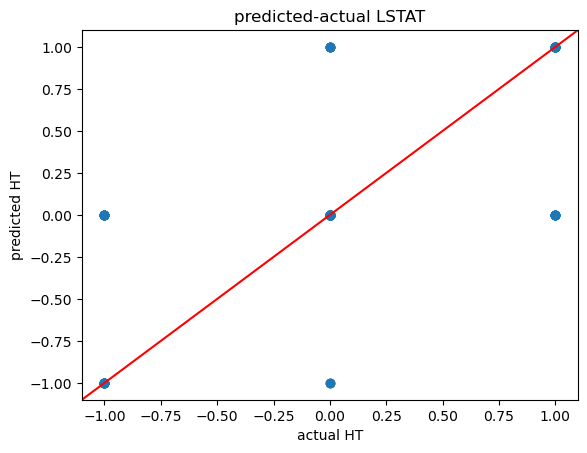

R2 score: 0.509400961958898
RMSE score: 0.492592183071889
              precision    recall  f1-score   support

          -1       0.84      0.55      0.67        29
           0       0.71      0.87      0.78        68
           1       0.82      0.72      0.77        39

    accuracy                           0.76       136
   macro avg       0.79      0.71      0.74       136
weighted avg       0.77      0.76      0.75       136



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.array(sorted_dataframe['LSTAT']), np.array(sorted_dataframe['HT']), test_size=0.3, random_state=42)

X_train_new = np.array([[i] for i in X_train])
X_test_new = np.array([[i] for i in X_test])

#X_train = np.array([X_train])

print(X_train_new.shape)
print(y_train.shape)
KN = KNeighborsClassifier(n_neighbors= 20)
KN.fit(X_train_new, y_train)


predicted = KN.predict(X_test_new)


plt.scatter(y_test, predicted)
plt.title('predicted-actual LSTAT')
plt.xlabel('actual HT')
plt.ylabel('predicted HT')
plt.axline((0, 0), (1, 1),color='red')
plt.show()


print('R2 score:', get_r2_score(predicted, y_test))
print('RMSE score:', get_root_mean_square_error(predicted, y_test))


class_report = classification_report(y_test, predicted)
print(class_report)

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : [1, 2, 3, 5, 7, 9, 10, 17, 20, 25, 30, 40, 50, 70]}  
   
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1,n_jobs=-1, scoring = 'accuracy') 
   
# fitting the model for grid search 
grid.fit(X_train_new, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
print(grid.best_score_)
grid_predictions = grid.predict(X_test_new) 


Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'n_neighbors': 25}
0.7753472222222222


train data error: 
R2 score: 0.4359061543692595
RMSE score: 0.4465054183406904


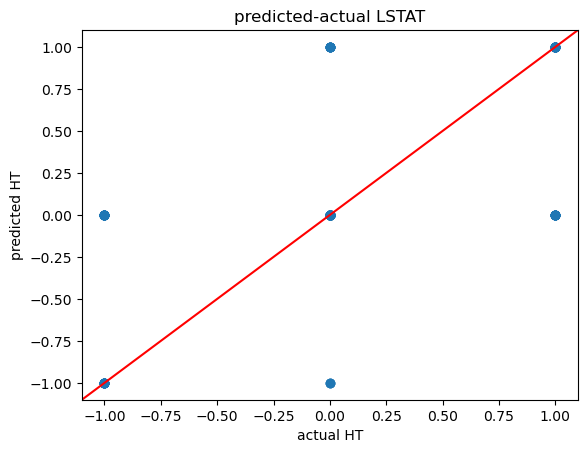

test data error: 
R2 score: 0.39046786182772175
RMSE score: 0.5490633736057197
              precision    recall  f1-score   support

          -1       0.80      0.41      0.55        29
           0       0.66      0.84      0.74        68
           1       0.76      0.67      0.71        39

    accuracy                           0.70       136
   macro avg       0.74      0.64      0.66       136
weighted avg       0.72      0.70      0.69       136



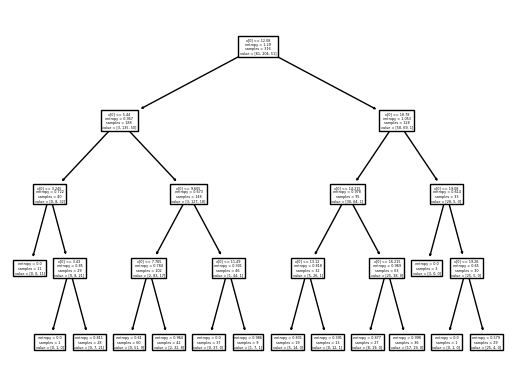

In [42]:
from sklearn import tree

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(np.array(sorted_dataframe['LSTAT']), np.array(sorted_dataframe['HT']), test_size=0.3, random_state=42)

X_train_new = np.array([[i] for i in X_train])
X_test_new = np.array([[i] for i in X_test])

DS = tree.DecisionTreeClassifier(criterion = "entropy" , max_depth = 4)
DS.fit(X_train_new, y_train)


predicted_train = DS.predict(X_train_new)
print('train data error: ')
print('R2 score:', get_r2_score(predicted_train, y_train))
print('RMSE score:', get_root_mean_square_error(predicted_train, y_train))

# predicted = DS.predict(X_train_new)

# class_report = classification_report(y_train, predicted)
# print(class_report)


predicted = DS.predict(X_test_new)

plt.scatter(y_test, predicted)
plt.title('predicted-actual LSTAT')
plt.xlabel('actual HT')
plt.ylabel('predicted HT')
plt.axline((0, 0), (1, 1),color='red')
plt.show()

tree.plot_tree(DS)

print('test data error: ')
print('R2 score:', get_r2_score(predicted, y_test))
print('RMSE score:', get_root_mean_square_error(predicted, y_test))

class_report = classification_report(y_test, predicted)
print(class_report)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5) 
   

grid.fit(X_train_new, y_train) 
 
print(grid.best_params_) 
print(grid.best_score_)
grid_predictions = grid.predict(X_test_new) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
0.7722222222222221


/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt

27

in DS accuracy with depth = 15 is greater but the plot shows that with depth = 4 we have better classification.

this function try all combinations of the given grid and find the best combination that have greater score(we can use which scoring method to use).


29

yes this model is overfitting and r2 in training data is much more better that test data.

accuracy train = 92,
accuracy test = 71

# Ensemble


30

Ensemble methods are techniques that aim at improving the accuracy of results in models by combining multiple models instead of using a single model. The combined models increase the accuracy of the results significantly. This has boosted the popularity of ensemble methods in machine learning.

31

* bagging:

    uses for reducing the variance of the model to avoid overfitting.

    Each of those datasets is then used to fit an individual model which produces individual predictions for the given data. Those predictions are then aggregated into one final classifier.
* boosting:

    boosting method tries aims to reduce the bias to avoid underfitting the data.

    You create a subset of the data and train it then create a new random subset of the original training data but weight those misclassified entries   higher.combined the new model with the ensemble model.

differences :
1. Boosting uses sequential processing instead of parallel calculations that uses in Bagging.
2. boosting updated the existing model but bagging create independent models and aggregate them together.
3. bagging uses random bags but boosting puts higher importance on misclassified data.

32

Random Forest grows multiple decision trees which are merged together for a more accurate prediction.

each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.

33

Bootstrap means that instead of training on all the observations, each tree of RF is trained on a subset of the observations. The chosen subset is called the bag, and the remaining are called Out of Bag samples.
statistical resampling technique that involves random sampling of a dataset with replacement.

its useful because it allows generation of new samples from a population without having to go and collect additional "training data". 

34

They suggest that a random forest should have a number of trees between 64 - 128 trees. but the more data , more trees needed.

increasing the number of trees in random forest , increases the model accuracy and complexity and decrease the risk of overfitting.

35

Computational efficiency: Random Forest can be computationally expensive, especially when dealing with a large number of trees or features.

Outlier detection: Random Forest may not be the best choice for outlier detection tasks.


Random Forests can be used for feature selection. and finding out relationship between features.

36

improve the variance reduction of bagging by reducing the correlation between the trees,




37

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.array(sorted_dataframe['LSTAT']), np.array(sorted_dataframe['HT']), test_size=0.3, random_state=42)

X_train_new = np.array([[i] for i in X_train])
X_test_new = np.array([[i] for i in X_test])


RF = RandomForestClassifier(criterion= 'entropy', max_depth= 4, n_estimators= 200)

RF.fit(X_train_new, y_train)

predicted = RF.predict(X_train_new)

print('R2 score:', get_r2_score(predicted, y_train))
print('RMSE score:', get_root_mean_square_error(predicted, y_train))



predicted = RF.predict(X_test_new)

print('R2 score:', get_r2_score(predicted, y_test))
print('RMSE score:', get_root_mean_square_error(predicted, y_test))

accuracy_score(y_test,predicted)


class_report = classification_report(y_test, predicted)
print(class_report)

R2 score: 0.4359061543692595
RMSE score: 0.4465054183406904
R2 score: 0.44993441189330985
RMSE score: 0.5215925838520058
              precision    recall  f1-score   support

          -1       0.81      0.45      0.58        29
           0       0.68      0.85      0.76        68
           1       0.80      0.72      0.76        39

    accuracy                           0.73       136
   macro avg       0.76      0.67      0.70       136
weighted avg       0.74      0.73      0.72       136



In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 30, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5) 
   

grid.fit(X_train_new, y_train) 
 
print(grid.best_params_) 
print(grid.best_score_)
grid_predictions = grid.predict(X_test_new) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
0.7722718253968255


# Support Vector Machine

40

1, 2

R2 score: 0.44993441189330985
RMSE score: 0.5215925838520058
              precision    recall  f1-score   support

          -1       0.80      0.41      0.55        29
           0       0.67      0.90      0.77        68
           1       0.87      0.67      0.75        39

    accuracy                           0.73       136
   macro avg       0.78      0.66      0.69       136
weighted avg       0.75      0.73      0.72       136



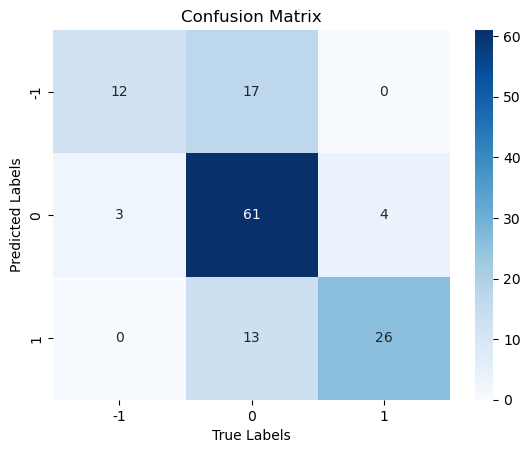

[[12 17  0]
 [ 3 61  4]
 [ 0 13 26]]


In [48]:
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.array(sorted_dataframe['LSTAT']), np.array(sorted_dataframe['HT']), test_size=0.3, random_state=42)

X_train_new = np.array([[i] for i in X_train])
X_test_new = np.array([[i] for i in X_test])


SVM = svm.SVC(kernel = 'rbf', C= 100, gamma = 0.001)

SVM.fit(X_train_new, y_train)

# predicted = SVM.predict(X_train_new)

# print('R2 score:', get_r2_score(predicted, y_train))
# print('RMSE score:', get_root_mean_square_error(predicted, y_train))



predicted = SVM.predict(X_test_new)

print('R2 score:', get_r2_score(predicted, y_test))
print('RMSE score:', get_root_mean_square_error(predicted, y_test))


class_report = classification_report(y_test, predicted)
print(class_report)
cm = confusion_matrix(y_test, predicted)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1],yticklabels=[-1, 0, 1])
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()
print(cm)

R2 score: 0.4648010494097069
RMSE score: 0.5144957554275266
              precision    recall  f1-score   support

          -1       0.82      0.48      0.61        29
           0       0.69      0.87      0.77        68
           1       0.82      0.69      0.75        39

    accuracy                           0.74       136
   macro avg       0.78      0.68      0.71       136
weighted avg       0.75      0.74      0.73       136



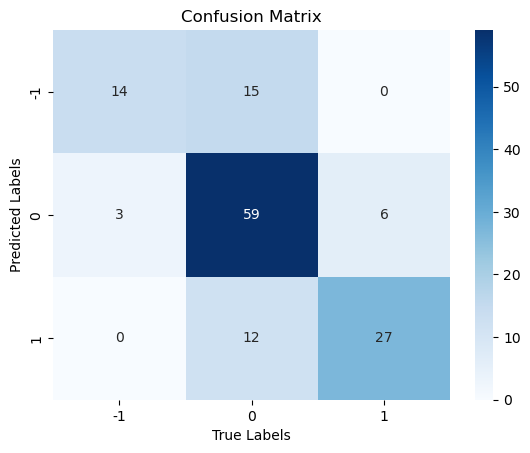

[[14 15  0]
 [ 3 59  6]
 [ 0 12 27]]


In [49]:
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.array(sorted_dataframe['LSTAT']), np.array(sorted_dataframe['HT']), test_size=0.3, random_state=42)

X_train_new = np.array([[i] for i in X_train])
X_test_new = np.array([[i] for i in X_test])


SVM = svm.SVC(kernel = 'linear', C= 0.1, gamma = 1)

SVM.fit(X_train_new, y_train)

# predicted = SVM.predict(X_train_new)

# print('R2 score:', get_r2_score(predicted, y_train))
# print('RMSE score:', get_root_mean_square_error(predicted, y_train))

predicted = SVM.predict(X_test_new)

print('R2 score:', get_r2_score(predicted, y_test))
print('RMSE score:', get_root_mean_square_error(predicted, y_test))


class_report = classification_report(y_test, predicted)
print(class_report)
cm = confusion_matrix(y_test, predicted)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1],yticklabels=[-1, 0, 1])
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()
print(cm)

4

In [50]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train_new, y_train) 

print(grid.best_params_) 
print(grid.best_estimator_) 
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train_new, y_train) 

print(grid.best_params_) 
print(grid.best_estimator_) 
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [31]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [32]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [33]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [34]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

IndentationError: expected an indented block after 'while' statement on line 4 (3694999079.py, line 17)

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias